# **Import CSV file(Dataset) to Google Colab from Github**

In [1]:
url = 'https://raw.githubusercontent.com/tiansien/GA2/main/dataR2.csv'

# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Load the data**

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [7]:
df.shape

(116, 10)

In [8]:
df.describe().T
# T is for transpose

,count,mean,std,min,25%,50%,75%,max
Age,116.0,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000
BMI,116.0,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759
Glucose,116.0,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
Insulin,116.0,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
HOMA,116.0,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
Leptin,116.0,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000
Adiponectin,116.0,10.180874,6.843341,1.656020,5.474283,8.352692,11.815970,38.040000
Resistin,116.0,14.725966,12.390646,3.210000,6.881763,10.827740,17.755207,82.100000
MCP.1,116.0,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000
Classification,116.0,1.551724,0.499475,1.000000,1.000000,2.000000,2.000000,2.000000


In [9]:
df.Classification.unique()
# to know how many unique value inside the data
# we realize got two only which is 1 breast cancer & 2 non breast cancer

array([1, 2], dtype=int64)

In [10]:
df['Classification'].value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

<Axes: xlabel='Classification', ylabel='count'>

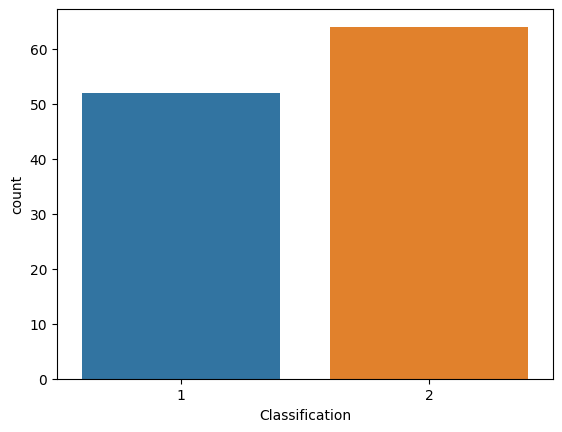

In [11]:
sns.countplot(data=df, x='Classification')

# **EDA**

Change the Classification Status

In [12]:
# Change the status
df['Classification'] = df.Classification.map({1:0, 2:1})
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


Statistical Summary

In [13]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Age,116.000000,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000
BMI,116.000000,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759
Glucose,116.000000,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
Insulin,116.000000,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
HOMA,116.000000,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
Leptin,116.000000,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000
Adiponectin,116.000000,10.180874,6.843341,1.656020,5.474283,8.352692,11.815970,38.040000
Resistin,116.000000,14.725966,12.390646,3.210000,6.881763,10.827740,17.755207,82.100000
MCP.1,116.000000,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000
Classification,116.000000,0.551724,0.499475,0.000000,0.000000,1.000000,1.000000,1.000000


Checking for the missing data

In [14]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


# **Clean and prepare the data**

In [15]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [16]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [17]:
df.corr()
# important to check there're two reletion between

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


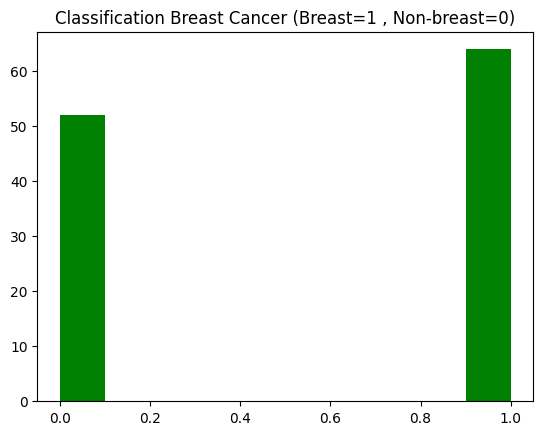

In [18]:
plt.hist(df['Classification'], color='g')
plt.title('Classification Breast Cancer (Breast=1 , Non-breast=0)')
plt.show()

<Axes: >

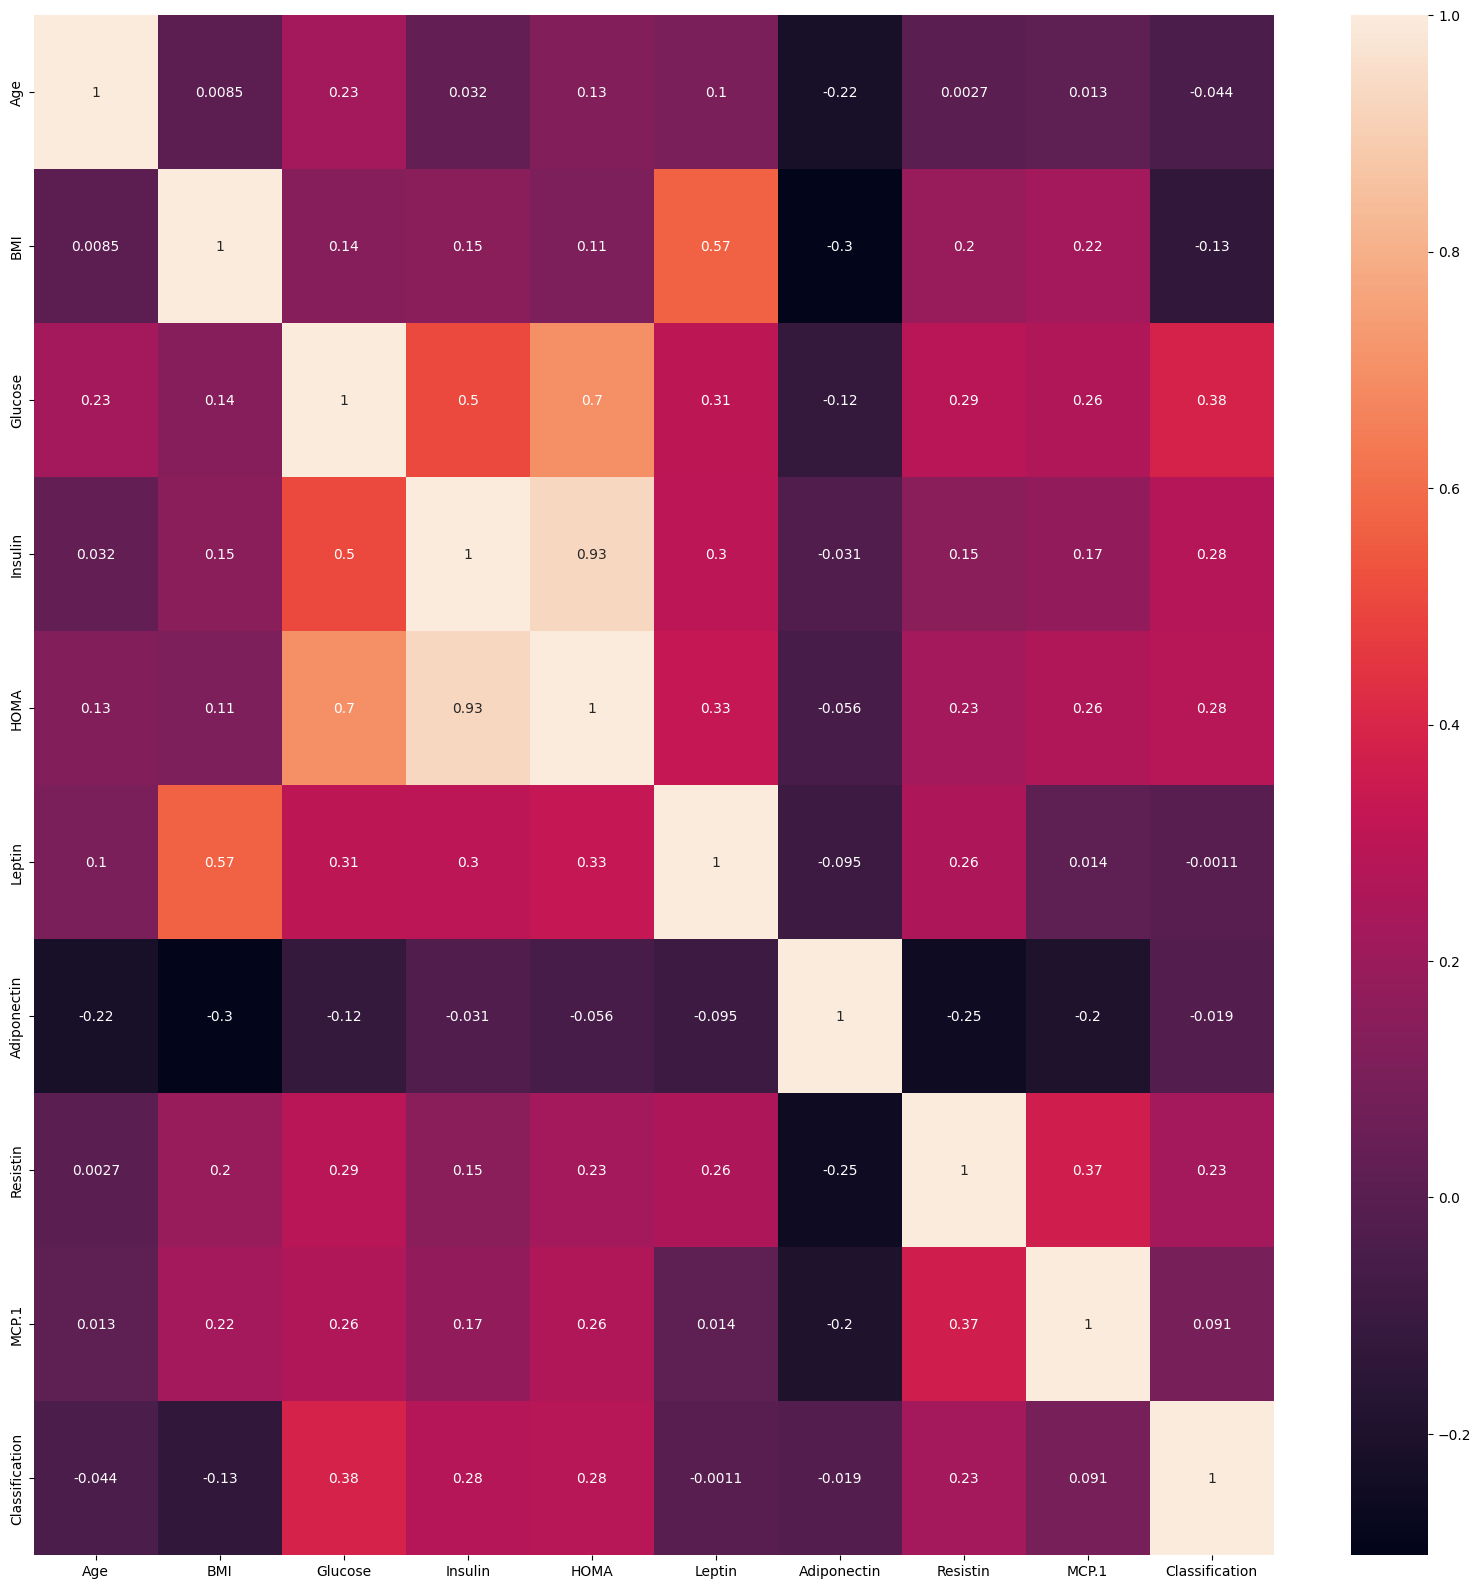

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [20]:
#check
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


In [21]:
colu=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

for a in range(len(colu)):
    print("Is there any negative value in '{}' column  : {} ".format(colu[a],(df[colu[a]]<0).any()))

Is there any negative value in 'Age' column  : False 
Is there any negative value in 'BMI' column  : False 
Is there any negative value in 'Glucose' column  : False 
Is there any negative value in 'Insulin' column  : False 
Is there any negative value in 'HOMA' column  : False 
Is there any negative value in 'Leptin' column  : False 
Is there any negative value in 'Adiponectin' column  : False 
Is there any negative value in 'Resistin' column  : False 
Is there any negative value in 'MCP.1' column  : False 


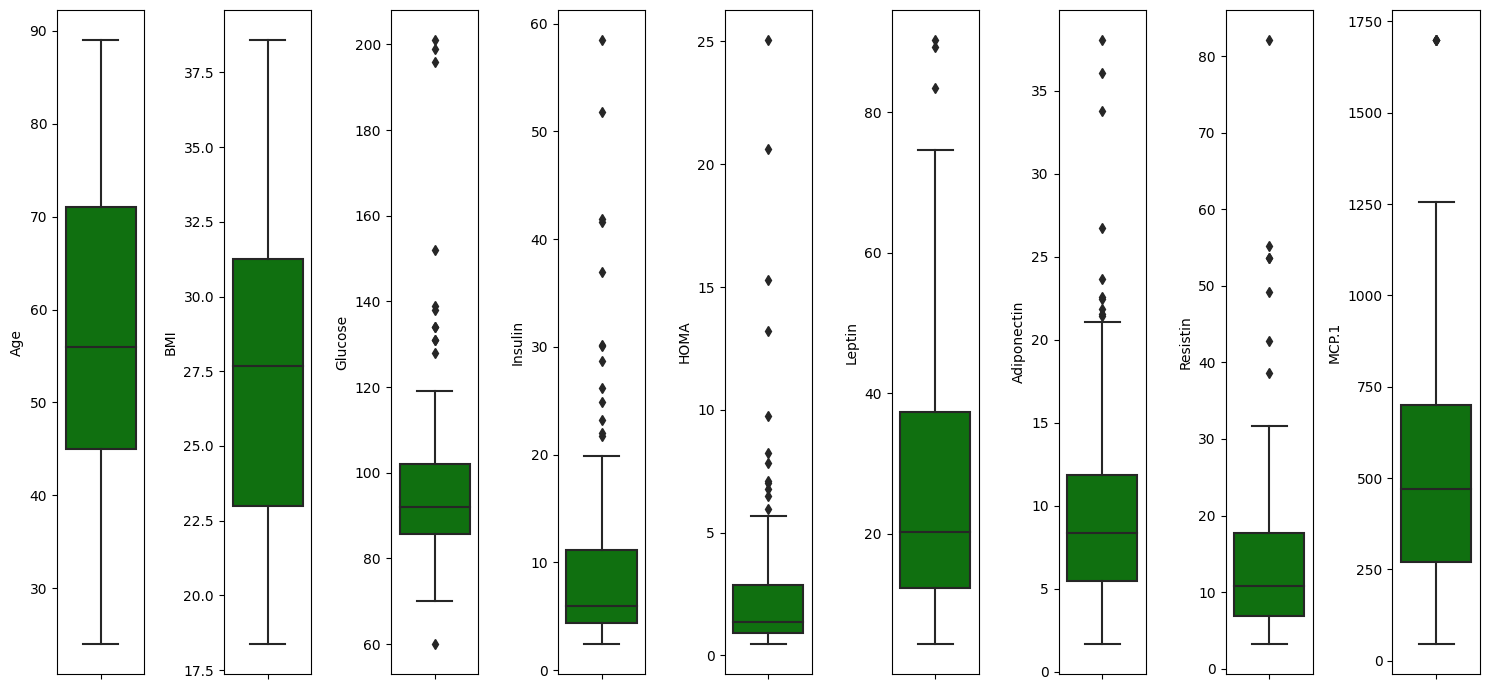

In [22]:
# checking the outliner
featuresNum = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

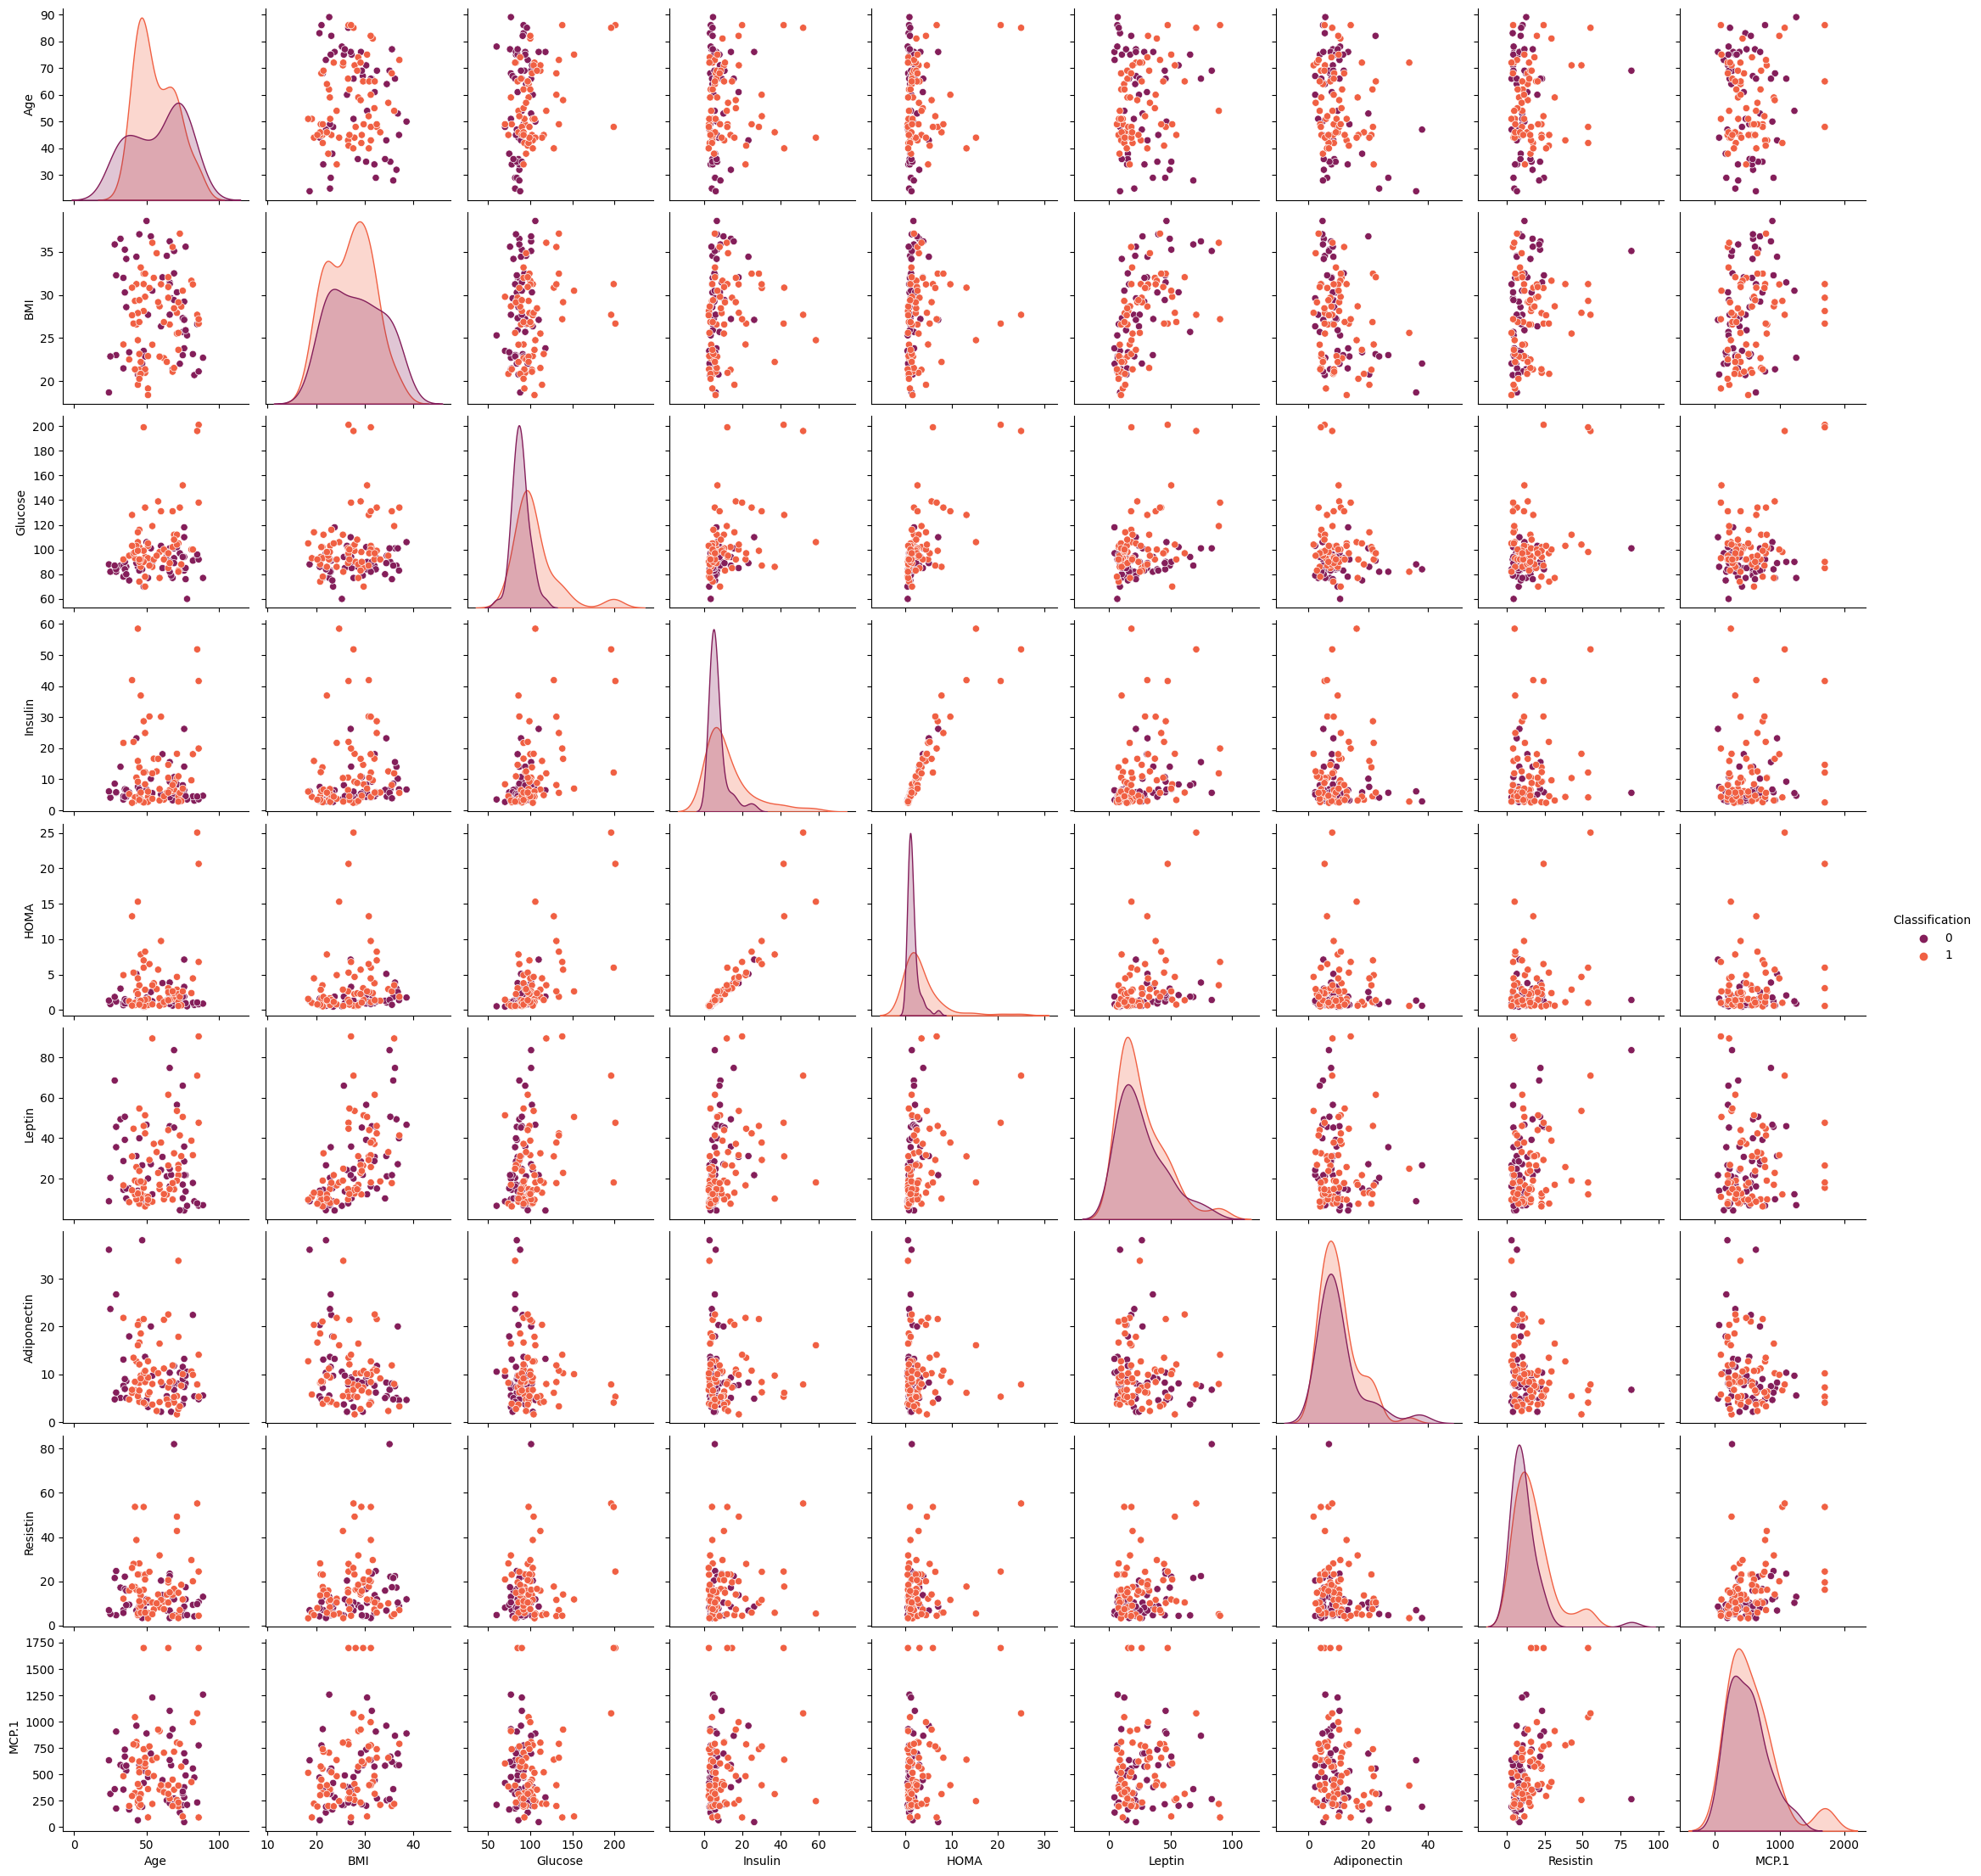

In [23]:
# generate a scatter plot matrix with the "mean" columns
cols = ['Age',
        'BMI', 
        'Glucose', 
        'Insulin', 
        'HOMA', 
        'Leptin', 
        'Adiponectin', 
        'Resistin',
        'MCP.1', 
        'Classification']

sns.pairplot(data=df[cols], hue='Classification', palette='rocket')

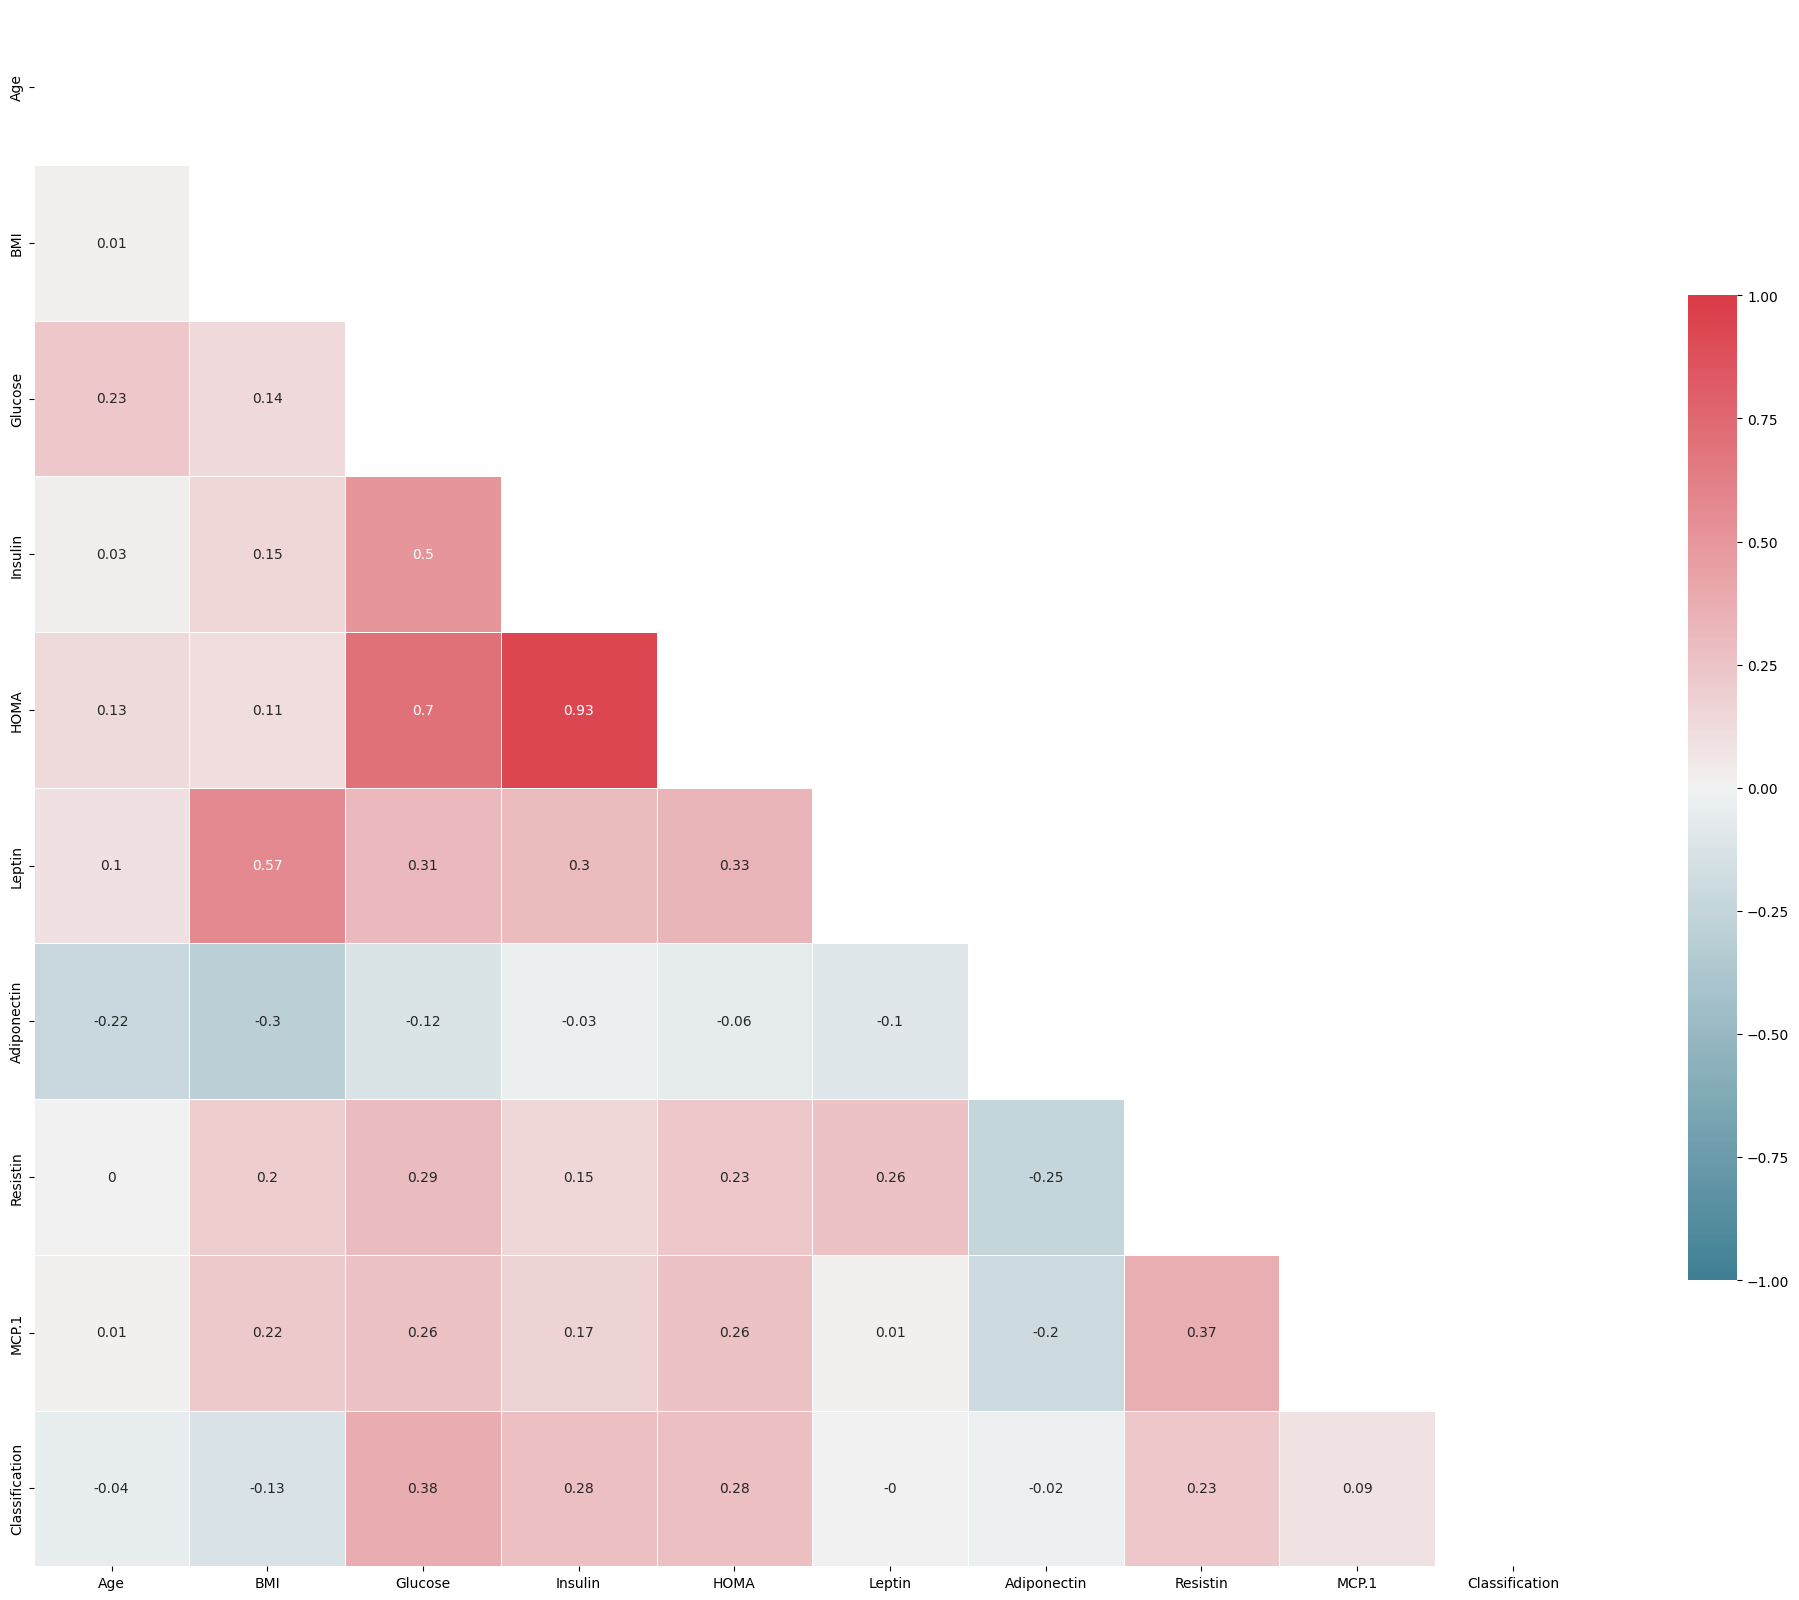

In [24]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Scatter plot

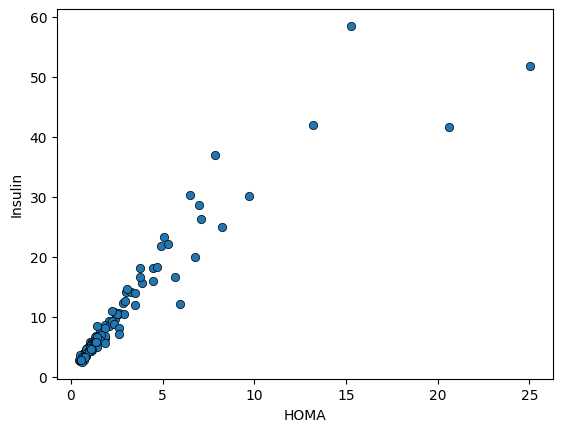

In [25]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['HOMA'], y=df['Insulin'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="HOMA", ylabel="Insulin")

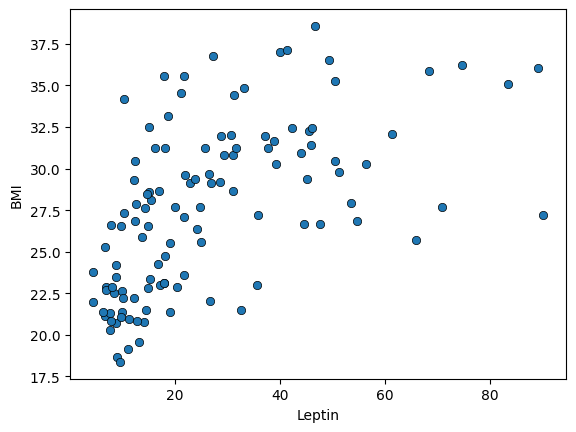

In [26]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['Leptin'], y=df['BMI'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Leptin", ylabel="BMI")

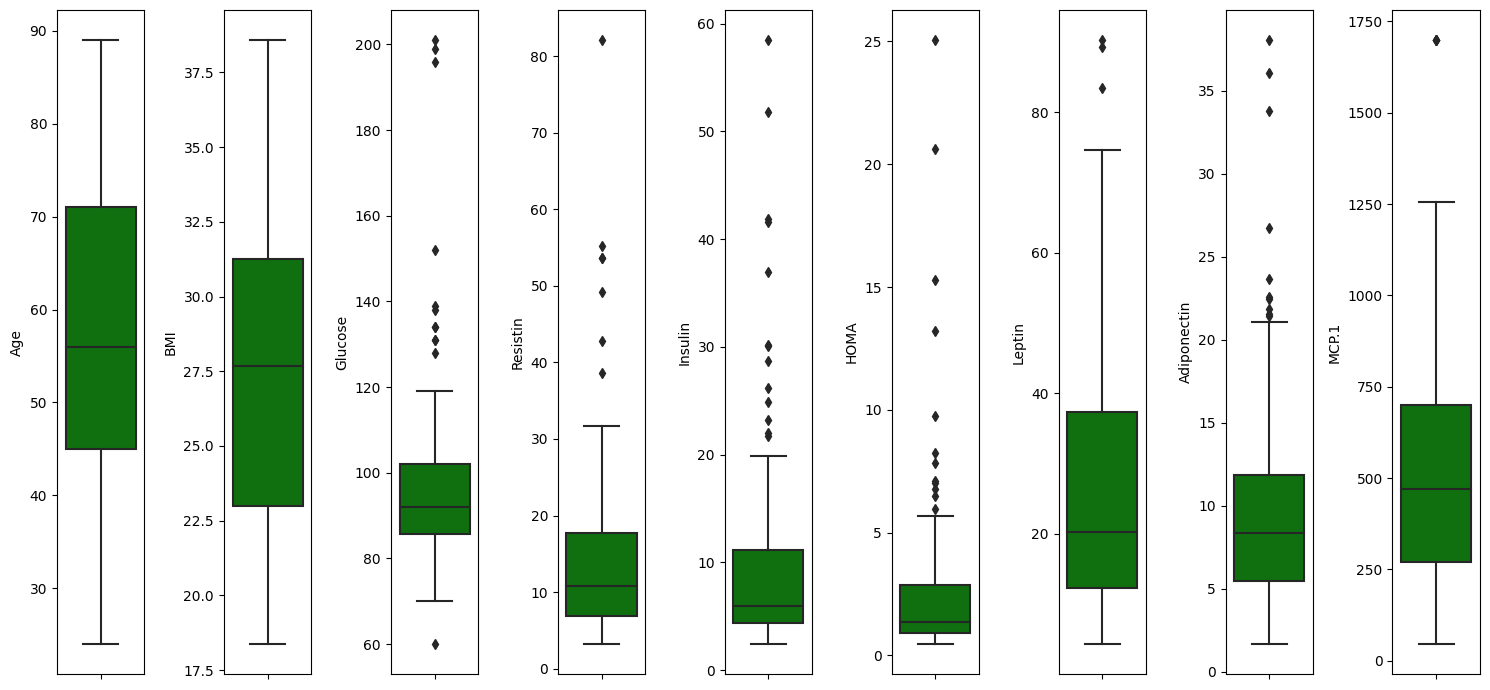

In [27]:
featuresNum = ['Age', 'BMI', 'Glucose', 'Resistin', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

How many patients have the breast cancer?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


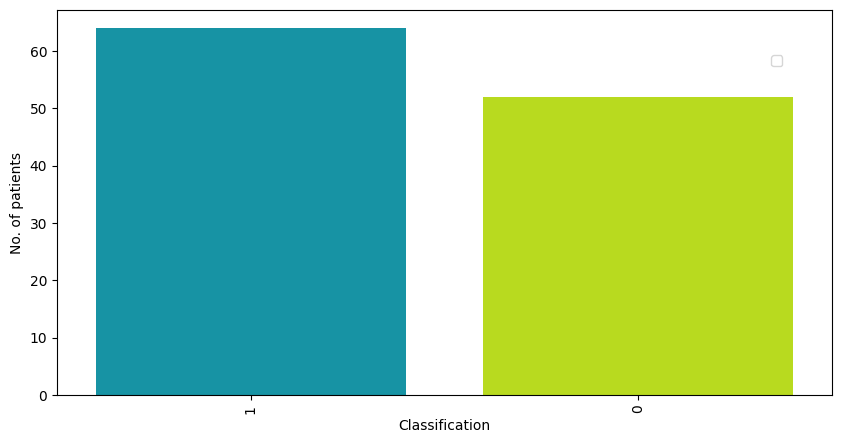

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="Classification", data=df, palette="nipy_spectral",
              order=df.Classification.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Classification", ylabel="No. of patients")
plt.legend(bbox_to_anchor=(0.945, 0.90))

Which Age related to Patients or Healty Control Health?

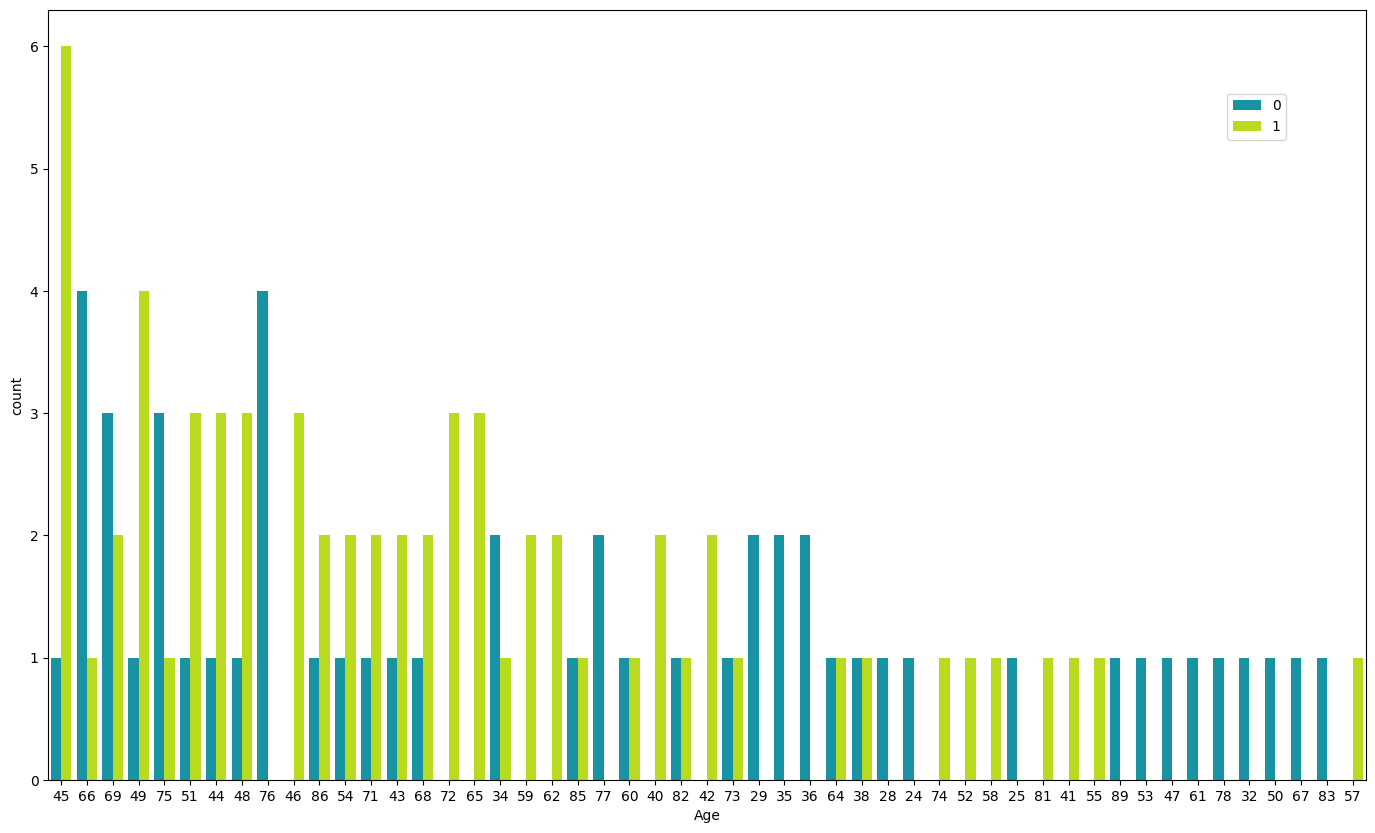

In [29]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="Age", hue="Classification", data=df, palette="nipy_spectral",
              order=df.Age.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))


Breast Cancer Patients Corresponding to Age

In [30]:
import plotly.express as px

fig = px.histogram(df, x="Age",color="Classification",
                   marginal="box",
                   hover_data=df.columns,
                  color_discrete_sequence=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Age"
)
fig.show()

Breast Cancer Patients corresponding to Glucose

In [31]:
import plotly.figure_factory as ff

more = df[df['Classification']==1]['Glucose']
less = df[df['Classification']==0]['Glucose']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Glucose",
    xaxis_title="Glucose",
)
fig.show()

In [32]:
more = df[df['Classification']==1]['Glucose']
less = df[df['Classification']==0]['Glucose']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , bin_size=5,
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Glucose",
    xaxis_title="Glucose",
)
fig.show()

Breast Cancer Patients corresponding to Resistin

In [33]:
more = df[df['Classification']==1]['Resistin']
less = df[df['Classification']==0]['Resistin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Resistin",
    xaxis_title="Resistin",
)
fig.show()

In [34]:
more = df[df['Classification']==1]['Resistin']
less = df[df['Classification']==0]['Resistin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , bin_size=5,
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Resistin",
    xaxis_title="Resistin",
)
fig.show()

Breast Cancer Patients corresponding to BMI

In [35]:
more = df[df['Classification']==1]['BMI']
less = df[df['Classification']==0]['BMI']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to BMI",
    xaxis_title="BMI",
)
fig.show()

In [36]:
more = df[df['Classification']==1]['BMI']
less = df[df['Classification']==0]['BMI']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , bin_size=5,
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to BMI",
    xaxis_title="BMI",
)
fig.show()

Breast Cancer Patients corresponding to Insulin

In [37]:
more = df[df['Classification']==1]['Insulin']
less = df[df['Classification']==0]['Insulin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Insulin",
    xaxis_title="Insulin",
)
fig.show()

Breast Cancer Patients corresponding to HOMA

In [38]:
more = df[df['Classification']==1]['HOMA']
less = df[df['Classification']==0]['HOMA']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to HOMA",
    xaxis_title="HOMA",
)
fig.show()

Breast Cancer Patients corresponding to Leptin

In [39]:
more = df[df['Classification']==1]['Leptin']
less = df[df['Classification']==0]['Leptin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Leptin",
    xaxis_title="Leptin",
)
fig.show()

Breast Cancer Patients corresponding to Adiponectin

In [40]:
more = df[df['Classification']==1]['Adiponectin']
less = df[df['Classification']==0]['Adiponectin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Adiponectin",
    xaxis_title="Adiponectin",
)
fig.show()

Breast Cancer Patients corresponding to MCP.1

In [41]:
more = df[df['Classification']==1]['MCP.1']
less = df[df['Classification']==0]['MCP.1']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to MCP.1",
    xaxis_title="MCP.1",
)
fig.show()

In [42]:
df["Glucose"] = np.log(df["Glucose"])
df["Insulin"] = np.log(df["Insulin"])
df["HOMA"] = np.log(df["HOMA"])
df["Leptin"] = np.log(df["Leptin"])
df["Adiponectin"] = np.log(df["Adiponectin"])
df["Resistin"] = np.log(df["Resistin"])
df["MCP.1"] = np.log(df["MCP.1"])

Drop unused column for modelling

In [43]:
df = df.drop(['Insulin'],axis=1)
df = df.drop(['MCP.1'],axis=1)
df = df.drop(['Adiponectin'],axis=1)
df = df.drop(['Leptin'],axis=1)
df = df.drop(['HOMA'],axis=1)

# **Building Model**

In [44]:
# We need to separate it first before train the data
X = df.drop(['Classification'],axis=1)
y= df['Classification']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

# **Feature Scaling**

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [48]:
# # Scaling the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X =  sc.fit_transform(X)
# X

# **Models and finding out the Best one**

**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[13,  4],
       [ 4, 14]], dtype=int64)

<Axes: >

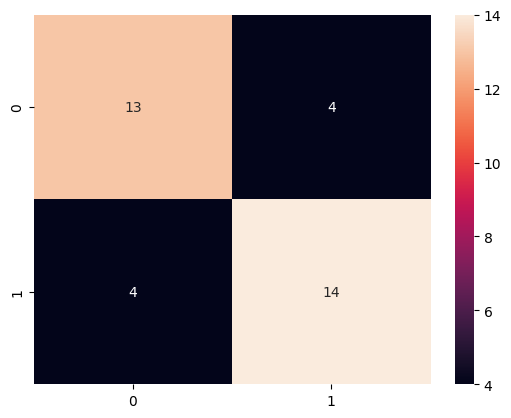

In [51]:
sns.heatmap(cm,annot=True)

In [52]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.7714285714285715


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,prediction1)

0.7714285714285715

**Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [56]:
from sklearn.metrics import accuracy_score

# Training performance
train_predictions = model2.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Test/Validation performance
test_predictions = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", test_accuracy)


Training Accuracy:  1.0
Validation Accuracy:  0.8571428571428571


In [57]:
cm2

array([[14,  3],
       [ 2, 16]], dtype=int64)

In [58]:
accuracy_score(y_test,prediction2)

0.8571428571428571

**Random Forest**

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[13,  4],
       [ 2, 16]], dtype=int64)

In [60]:
accuracy_score(y_test, prediction3)

0.8285714285714286

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.80      0.89      0.84        18

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



In [62]:
from sklearn.metrics import accuracy_score

# Training predictions
train_prediction = model3.predict(X_train)

# Training accuracy
train_accuracy = accuracy_score(y_train, train_prediction)
print("Training Accuracy: ", train_accuracy)

# Validation/Test accuracy
validation_accuracy = accuracy_score(y_test, prediction3)
print("Validation Accuracy: ", validation_accuracy)


Training Accuracy:  1.0
Validation Accuracy:  0.8285714285714286


In [63]:
print(classification_report(y_test, prediction1))

print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.78      0.78      0.78        18

    accuracy                           0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.77      0.77      0.77        35

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.84      0.89      0.86        18

    accuracy                           0.86        35
   macro avg       0.86      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



**K Nearest Neighbor (K NN) Support Vector Machine Naive Bayes**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [65]:
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [67]:
# evaluate each model

results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10, shuffle=True, random_state=40)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN:, 0.754167, (0.155289)
NB:, 0.727778, (0.135401)
SVM:, 0.815278, (0.099391)


In [68]:
# make predictions on validation datasets

SVM = SVC()
SVM.fit(X_train, y_train)
predictions= SVM.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.82      0.78      0.80        18

    accuracy                           0.80        35
   macro avg       0.80      0.80      0.80        35
weighted avg       0.80      0.80      0.80        35

[[14  3]
 [ 4 14]]


In [69]:
from sklearn.metrics import accuracy_score

# Training performance
train_predictions = SVM.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Test/Validation performance
test_predictions = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", test_accuracy)


Training Accuracy:  0.9135802469135802
Validation Accuracy:  0.8571428571428571


SVM

Training Accuracy : 1.0
Testing Accuracy : 0.8285714285714286


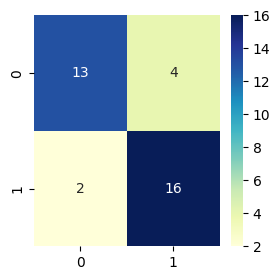

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.80      0.89      0.84        18

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35

------------------------------------------
ROC AUC Curves  :  0.8267973856209149
Sensitivity :  0.7647058823529411
Specificity :  0.8888888888888888


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC Curves  : ",roc_auc)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

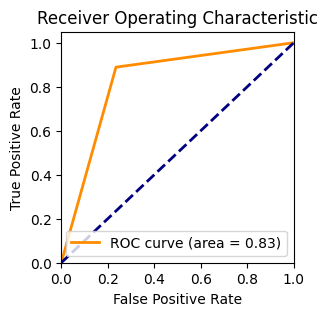

In [71]:
# Plot ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [72]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [73]:
import tensorflow as tf

In [74]:
x_train = tf.constant(X_train)
y_train = tf.constant(y_train)
x_test = tf.constant(X_test)
y_test = tf.constant(y_test)
x_train.shape, y_train.shape

(TensorShape([81, 4]), TensorShape([81]))

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)), # (81, 4)
    tf.keras.layers.Dense(128, activation="relu"), # W . x + b
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.metrics.Accuracy(), tf.metrics.AUC(), tf.metrics.Precision()]
)

history = model.fit(
    x_train, 
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/100
2/2 [==============================] - 2s 431ms/step - loss: 0.6858 - accuracy: 0.0000e+00 - auc: 0.6342 - precision: 0.6800 - val_loss: 0.6461 - val_accuracy: 0.0000e+00 - val_auc: 0.8039 - val_precision: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6342 - accuracy: 0.0000e+00 - auc: 0.8432 - precision: 0.8000 - val_loss: 0.6108 - val_accuracy: 0.0000e+00 - val_auc: 0.8268 - val_precision: 0.6818
Epoch 3/100
2/2 [==============================] - 0s 53ms/step - loss: 0.5929 - accuracy: 0.0000e+00 - auc: 0.8652 - precision: 0.8000 - val_loss: 0.5820 - val_accuracy: 0.0000e+00 - val_auc: 0.8399 - val_precision: 0.7895
Epoch 4/100
2/2 [==============================] - 0s 54ms/step - loss: 0.5608 - accuracy: 0.0000e+00 - auc: 0.8720 - precision: 0.8125 - val_loss: 0.5589 - val_accuracy: 0.0000e+00 - val_auc: 0.8399 - val_precision: 0.7895
Epoch 5/100
2/2 [==============================] - 0s 37ms/step - loss: 0.5332 - accuracy: 0.0000e+00 -

In [76]:
aucname = [metrics for metrics in history.history.keys() if "auc" in metrics]
auc = history.history[aucname[0]]
val_auc = history.history[aucname[1]]

aucname, len(auc)

(['auc', 'val_auc'], 100)

In [102]:
# import tensorflow as tf

# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(4,)),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dense(512, activation="relu"),
#     tf.keras.layers.Dense(1, activation="sigmoid"),
# ])

# model.compile(
#     optimizer="adam",
#     loss=tf.keras.losses.binary_crossentropy,
#     metrics=[tf.keras.metrics.BinaryAccuracy(), tf.metrics.AUC(), tf.metrics.Precision(), tf.metrics.Recall, tf.metrics.F1Score()]
# )

# history = model.fit(
#     x_train, 
#     y_train,
#     epochs=60,
#     batch_size=64,
#     validation_data=(x_test, y_test)
# )


TypeError: 'property' object is not iterable

In [106]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.metrics.AUC(),
        tf.metrics.Precision(),
        tf.metrics.Recall()
    ]
)

history = model.fit(
    x_train, 
    y_train,
    epochs=60,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Compute F1 score manually
y_pred = model.predict(x_test)
y_pred_binary = tf.round(y_pred)
precision = tf.keras.metrics.Precision()(y_test, y_pred_binary)
recall = tf.keras.metrics.Recall()(y_test, y_pred_binary)
f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score:", f1_score)


Epoch 1/60
2/2 [==============================] - 2s 370ms/step - loss: 0.7137 - binary_accuracy: 0.3333 - auc_13: 0.2963 - precision_23: 0.3889 - recall_20: 0.3043 - val_loss: 0.6676 - val_binary_accuracy: 0.7714 - val_auc_13: 0.8464 - val_precision_23: 0.8125 - val_recall_20: 0.7222
Epoch 2/60
2/2 [==============================] - 0s 35ms/step - loss: 0.6595 - binary_accuracy: 0.7531 - auc_13: 0.8385 - precision_23: 0.7826 - recall_20: 0.7826 - val_loss: 0.6311 - val_binary_accuracy: 0.7714 - val_auc_13: 0.9020 - val_precision_23: 0.9167 - val_recall_20: 0.6111
Epoch 3/60
2/2 [==============================] - 0s 35ms/step - loss: 0.6229 - binary_accuracy: 0.7654 - auc_13: 0.8820 - precision_23: 0.8462 - recall_20: 0.7174 - val_loss: 0.6036 - val_binary_accuracy: 0.7143 - val_auc_13: 0.8676 - val_precision_23: 0.8333 - val_recall_20: 0.5556
Epoch 4/60
2/2 [==============================] - 0s 36ms/step - loss: 0.5934 - binary_accuracy: 0.7778 - auc_13: 0.8804 - precision_23: 0.8500 

In [107]:
# Get the final epoch's training accuracy
final_train_accuracy = history.history['binary_accuracy'][-1]
print(f'Final training accuracy: {final_train_accuracy * 100}%')

# Get the final epoch's validation accuracy
final_val_accuracy = history.history['val_binary_accuracy'][-1]
print(f'Final validation accuracy: {final_val_accuracy * 100}%')


Final training accuracy: 92.59259104728699%
Final validation accuracy: 85.71428656578064%


Data Model Vitualization

In [117]:
import tensorflow as tf
import tensorflow_addons as tfa

modelvi = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

modelvi.compile(
    optimizer="adam",
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.metrics.AUC(),
        tf.metrics.Precision(),
        tf.metrics.Recall(),
        tfa.metrics.F1Score(num_classes=1, average='micro') # or whichever parameters you wish to use
    ]
)

history0 = model.fit(
    x_train, 
    y_train,
    epochs=60,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/60
2/2 [==============================] - 0s 88ms/step - loss: 0.2297 - binary_accuracy: 0.9259 - auc_13: 0.9776 - precision_23: 0.9762 - recall_20: 0.8913 - val_loss: 0.4443 - val_binary_accuracy: 0.8571 - val_auc_13: 0.8840 - val_precision_23: 0.8421 - val_recall_20: 0.8889
Epoch 2/60
2/2 [==============================] - 0s 43ms/step - loss: 0.2272 - binary_accuracy: 0.9259 - auc_13: 0.9776 - precision_23: 0.9762 - recall_20: 0.8913 - val_loss: 0.4452 - val_binary_accuracy: 0.8571 - val_auc_13: 0.8856 - val_precision_23: 0.8421 - val_recall_20: 0.8889
Epoch 3/60
2/2 [==============================] - 0s 49ms/step - loss: 0.2210 - binary_accuracy: 0.9259 - auc_13: 0.9798 - precision_23: 0.9762 - recall_20: 0.8913 - val_loss: 0.4551 - val_binary_accuracy: 0.8571 - val_auc_13: 0.8905 - val_precision_23: 0.8421 - val_recall_20: 0.8889
Epoch 4/60
2/2 [==============================] - 0s 47ms/step - loss: 0.2168 - binary_accuracy: 0.9383 - auc_13: 0.9786 - precision_23: 0.9767 -

In [128]:
# Print available keys in history.history
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'auc_13', 'precision_23', 'recall_20', 'val_loss', 'val_binary_accuracy', 'val_auc_13', 'val_precision_23', 'val_recall_20'])


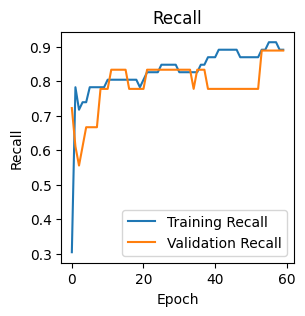

In [143]:
# Plot Recall graph
plt.plot(history.history['recall_20'], label='Training Recall')
plt.plot(history.history['val_recall_20'], label='Validation Recall')
plt.title('Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()



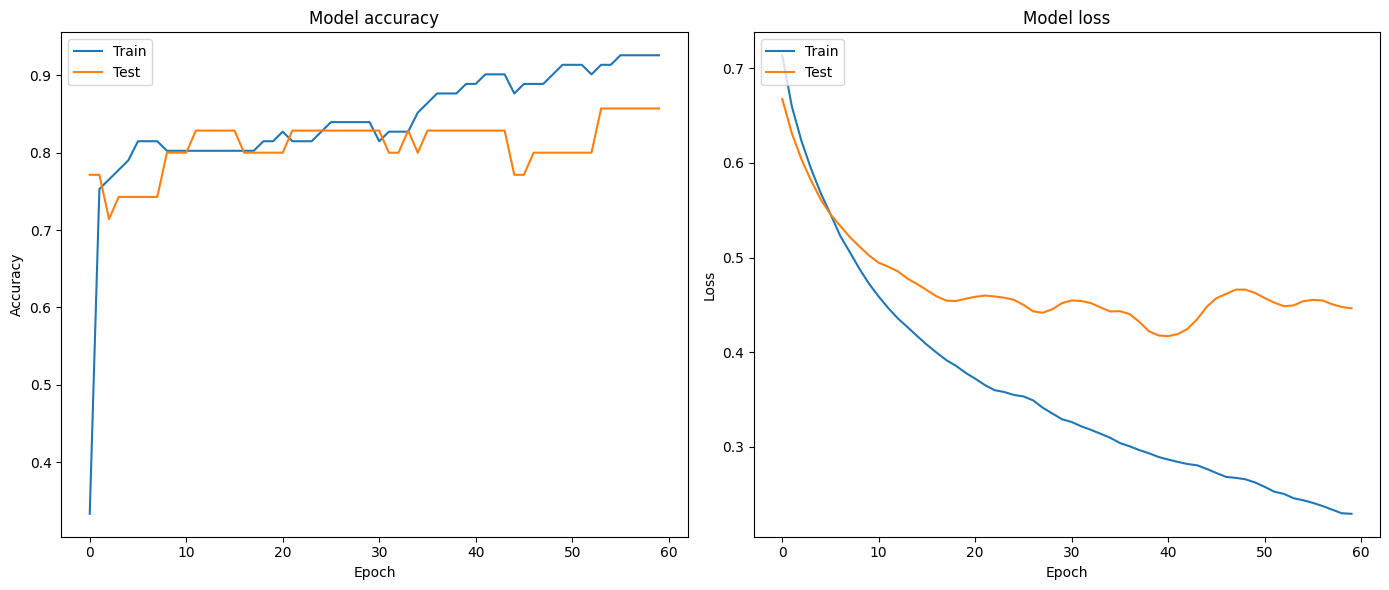

In [124]:

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


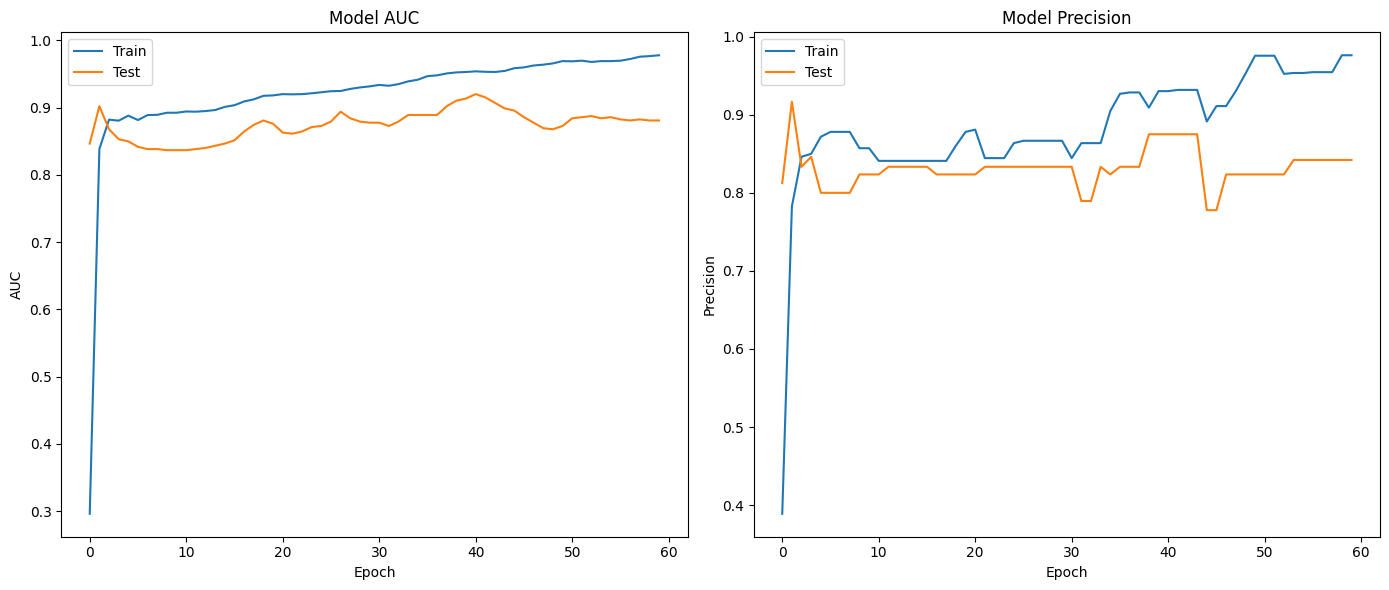

In [129]:
# Plot training & validation AUC values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['auc_13'])
plt.plot(history.history['val_auc_13'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation precision values
plt.subplot(1, 2, 2)
plt.plot(history.history['precision_23'])
plt.plot(history.history['val_precision_23'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


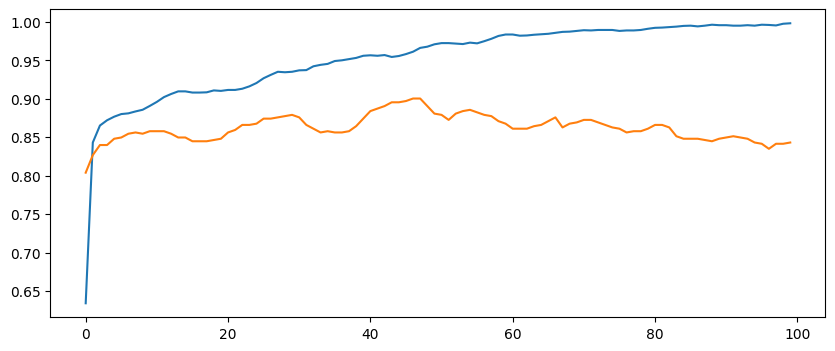

In [130]:
plt.figure(figsize=(10, 4))
plt.plot(auc)
plt.plot(val_auc)

In [131]:
# plt.figure(figsize=(10, 4))
# plt.plot(history.history['auc_6'])

Model Export

In [136]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 3ms/step


In [137]:
auc = tf.metrics.AUC()
aucmetrics = auc(y_test, tf.squeeze(y_pred)).numpy()
aucmetrics

0.8562091

In [138]:
y_test.shape, tf.squeeze(y_pred).shape

(TensorShape([35]), TensorShape([35]))

In [139]:
model.save("model.h5")

In [140]:
def load(weights="model.h5"):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(4,)), # (81, 4)
        tf.keras.layers.Dense(128, activation="relu"), # W . x + b
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ])
    model.load_weights(weights)
    return model

In [141]:
model = load("model/model.h5")
predict = lambda x : int(model.predict([x]).squeeze().item())

In [142]:
pred = predict([48,	23.500000,	4.248495,	2.078923])
print(f"class: {pred}")

1/1 [==============================] - 0s 85ms/step
class: 0
